In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

df = pd.read_csv(r"D:\Data Analysis\MySQL\Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# find invalid entries in Total Charges
df[df["TotalCharges"].str.strip() == ""]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [12]:
df.dropna(subset=['TotalCharges'], inplace=True)
df.reset_index(drop=True, inplace = True)

In [13]:
df.isnull().sum()
df['TotalCharges'].dtype

dtype('float64')

In [14]:
# Drop Unecessary Columns
df.drop('customerID',axis = 1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [16]:
df.shape


(7032, 20)

# Exploratory Data Analysis 

Churn Rate(%):
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


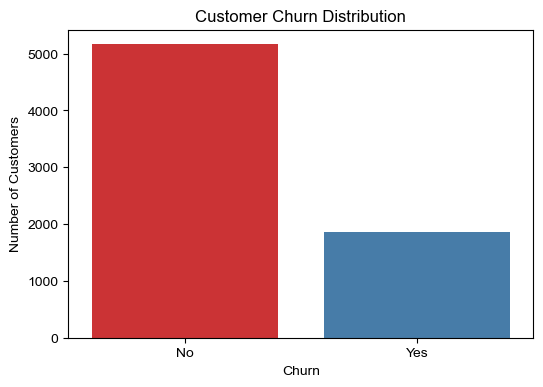

In [18]:
#1.) What is the overall churn rate?
# Plotting a Graph to visualize the insight
plt.figure(figsize=(6,4))
snb.countplot(x="Churn",data = df, palette="Set1")
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
snb.set(style="whitegrid")

churn_count = df["Churn"].value_counts()
churn_rate  = df['Churn'].value_counts(normalize=True)*100

print("Churn Rate(%):\n",churn_rate)
plt.show()

#X-axis: The categories you picked ('Churn' → Yes / No)
#Y-axis: Count of rows in each category (auto-calculated)

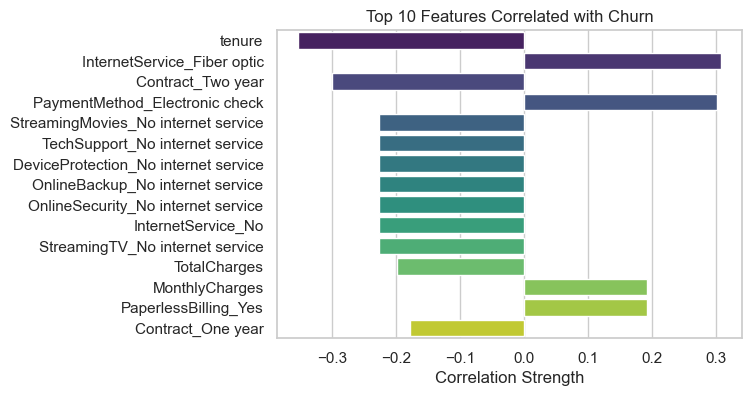

In [19]:
#2) Which features are most correlated with churn?
df_encoded = df.copy()
df_encoded["Churn"] = df_encoded["Churn"].map({"Yes":1, "No":0})
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

corr = df_encoded.corr()['Churn'].drop('Churn')
top_corr_signed = corr.sort_values(key = lambda x: abs(x), ascending=False).head(15)

#Plotting the Graph

snb.set(style="whitegrid")
plt.figure(figsize = (6,4))

snb.barplot(x=top_corr_signed.values, y = top_corr_signed.index, palette = 'viridis')
plt.title("Top 10 Features Correlated with Churn")
plt.xlabel("Correlation Strength")
plt.show()

<Figure size 800x600 with 0 Axes>

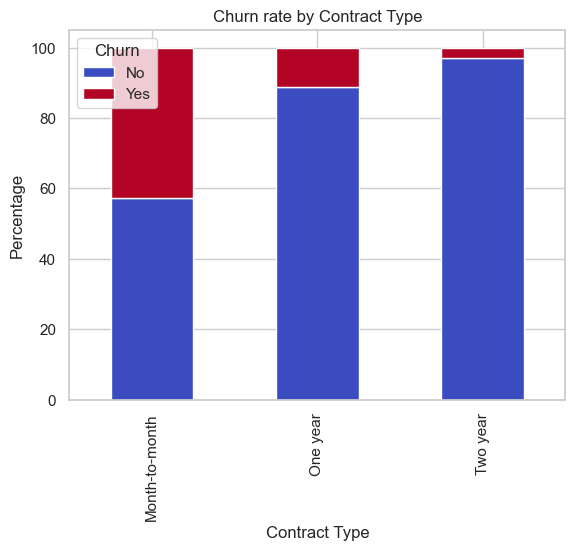

In [20]:
#3.)  What is the Churn Rate by Contract Type?
contract_churn = df.groupby(['Contract','Churn']).size().unstack()
contract_churn_percent = contract_churn.div(contract_churn.sum(axis = 1), axis = 0)*100

snb.set(style="whitegrid")
plt.figure(figsize = (8,6))
contract_churn_percent.plot(kind = "bar", stacked = True, colormap = "coolwarm"
)


plt.title("Churn rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Percentage")
plt.legend(title = "Churn")


plt.show()

C:\Temp\ipykernel_16860\1899134458.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby(['tenure_group','Churn']).size().unstack()


<Figure size 800x600 with 0 Axes>

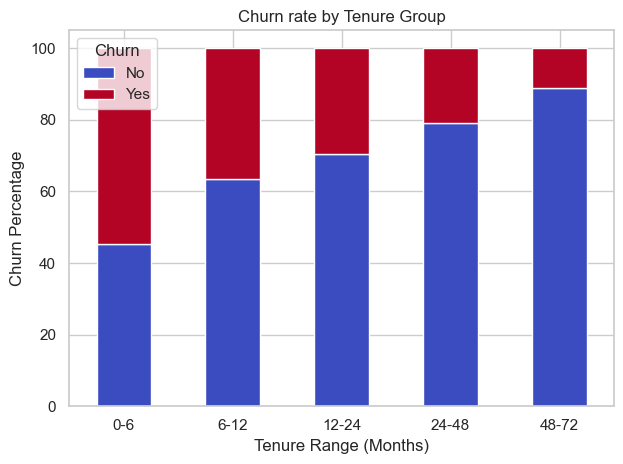

In [21]:
#4.) Churn by Tenure Group
# How does churn vary across different customer tenure ranges (e.g., 0–6 months, 6–12 months, etc.)?

bins = [0,6,12,24,48,72]
labels = ['0-6','6-12','12-24','24-48','48-72']
df['tenure_group'] = pd.cut(df['tenure'],bins=bins, labels=labels, right=False)
# pd.cut() creates a bucketed category
# right=false means it includes the left edge, excludes the right, like for 0-6(0--5 and not 6)
#breaks the tenure into grouped ranges

tenure_churn = df.groupby(['tenure_group','Churn']).size().unstack()
tenure_churn_percent = tenure_churn.div(tenure_churn.sum(axis=1), axis = 0)*100

snb.set(style = "whitegrid")
plt.figure(figsize = (8,6))
tenure_churn_percent.plot(kind="bar",stacked = True, colormap="coolwarm")
plt.xticks(rotation = 0)
plt.title("Churn rate by Tenure Group")
plt.xlabel("Tenure Range (Months)")
plt.ylabel("Churn Percentage")
plt.tight_layout()

plt.show()

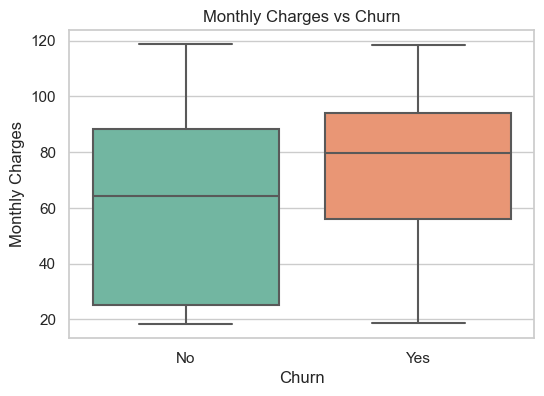

In [22]:
#5.) Churn vs Monthly Charges
# Are high-paying customers more likely to churn?

snb.set(style="whitegrid")
plt.figure(figsize = (6,4))
snb.boxplot(x="Churn", y="MonthlyCharges", data=df,palette = "Set2")

plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")

plt.show()

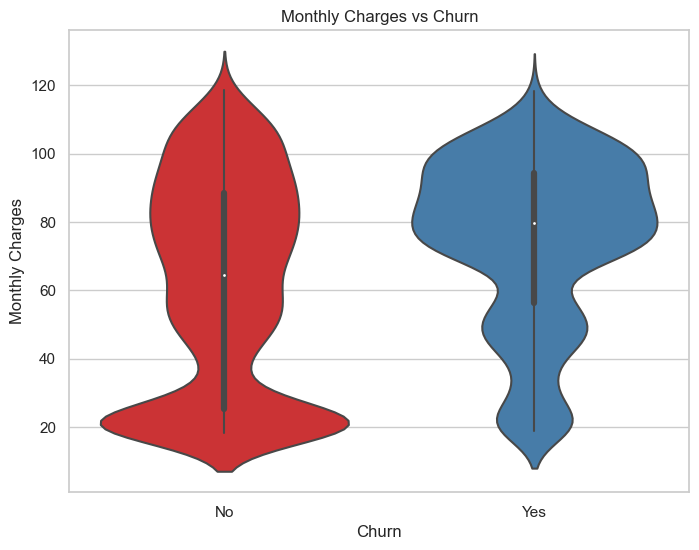

In [23]:
plt.figure(figsize = (8,6))
snb.set(style="whitegrid")
snb.violinplot(x="Churn", y="MonthlyCharges", data = df, palette = "Set1")
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

<Figure size 600x400 with 0 Axes>

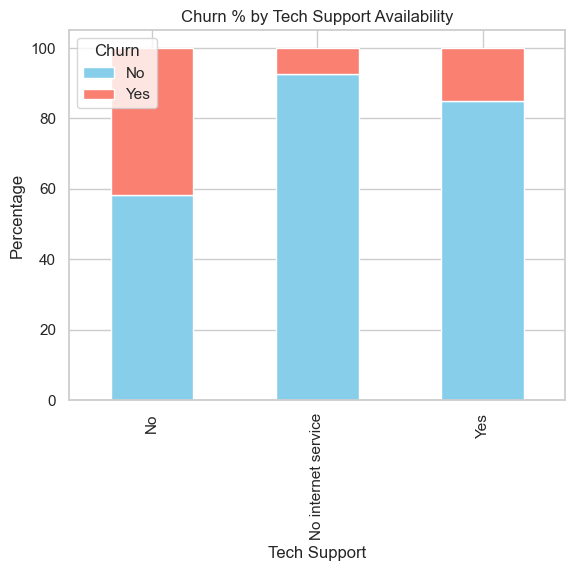

In [24]:
#6.)How Do Services Used Impact Churn?
#Do certain services (like Internet, Streaming, or Tech Support) lead to higher churn?

tech_support_churn = df.groupby(['TechSupport','Churn']).size().unstack()
tech_support_churn_percent = tech_support_churn.div(tech_support_churn.sum(axis=1),axis=0)*100

plt.figure(figsize = (6,4))
tech_support_churn_percent.plot(kind="bar", stacked=True,color=['skyblue','salmon'])
plt.title("Churn % by Tech Support Availability")
plt.xlabel("Tech Support")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.show()

Text(0, 0.5, 'Percentage')

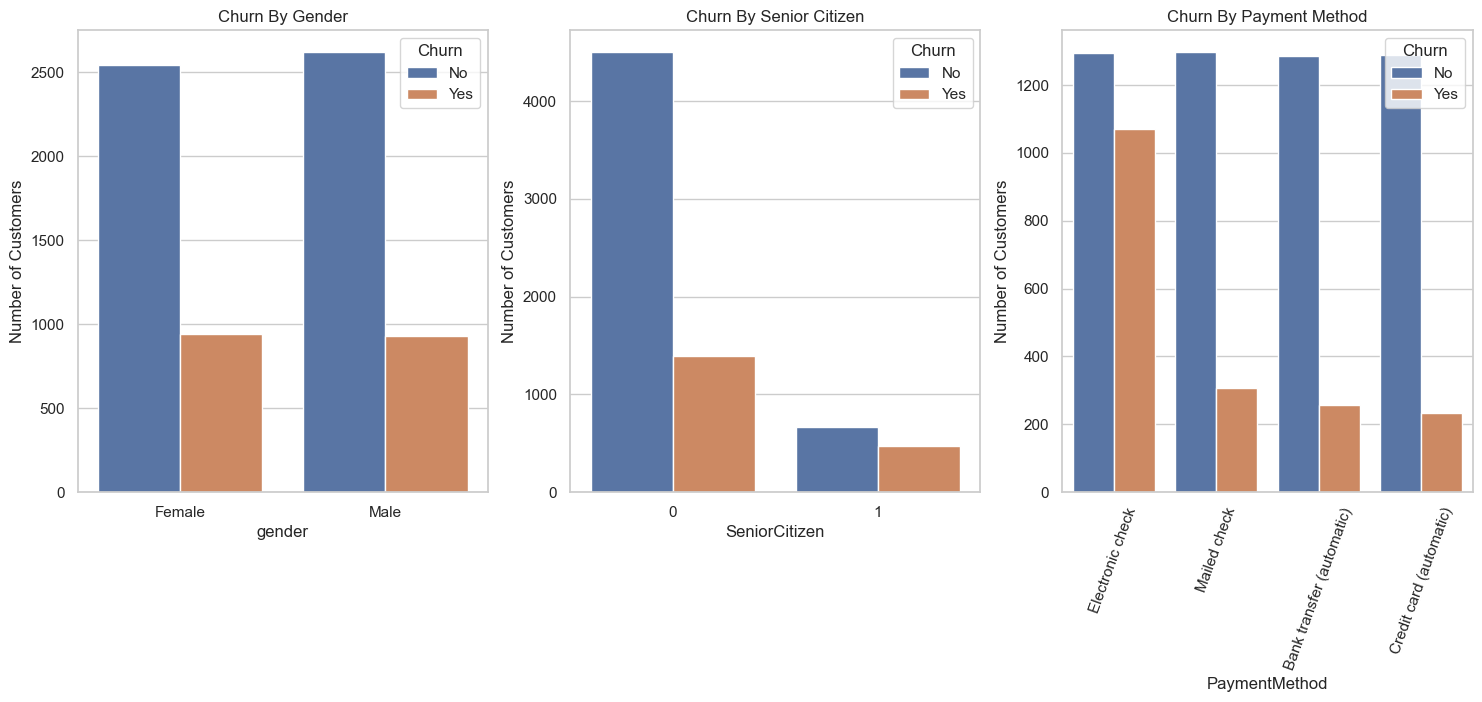

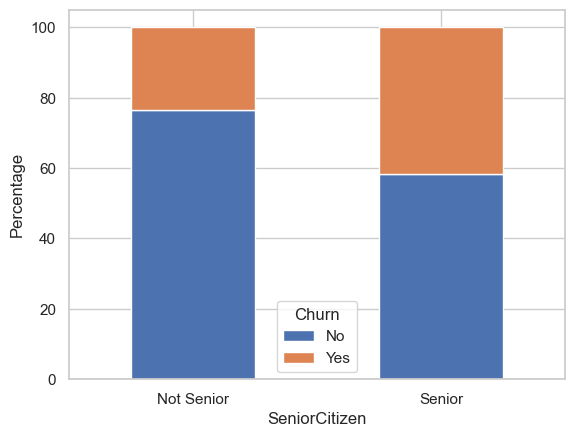

In [25]:
#7.) Churn by Demographics
# Does churn vary based on customer demographics like Gender, SeniorCitizen status, or Payment Method?

snb.set(style="whitegrid")
fig, axes = plt.subplots(1,3, figsize = (18,6))
snb.countplot(x="gender", hue = "Churn", data=df, ax=axes[0])
axes[0].set_title("Churn By Gender")

snb.countplot(x="SeniorCitizen", hue = "Churn", data=df,ax=axes[1])
axes[1].set_title("Churn By Senior Citizen")
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'Not Senior', 1: 'Senior'})


plt.xticks(rotation=70)
snb.countplot(x="PaymentMethod", hue = "Churn", data=df, ax=axes[2])
axes[2].set_title("Churn By Payment Method")

axes[0].set_ylabel("Number of Customers")
axes[1].set_ylabel("Number of Customers")
axes[2].set_ylabel("Number of Customers")


df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'Not Senior', 1: 'Senior'})
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
senior_churn_percent = senior_churn.div(senior_churn.sum(axis=1), axis=0) * 100
senior_churn_percent.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel("Percentage")

# Feature Engineering

In [27]:

# How new vs long-term customers behave 
def tenure_bracket(tenure):
    if tenure <=6:
        return '0-6 Months'
    elif tenure <=12:
        return '6-12 Months'
    elif tenure <=24:
        return '12-24 Months'
    elif tenure <=48:
        return '24-28 Months'
    else:
        return "48+ Months"
df['tenure_group'] = df["tenure"].apply(tenure_bracket)

# High Revenue Customers
monthly_charge_75 = df['MonthlyCharges'].quantile(0.75)
df["high_value_user"] = df["MonthlyCharges"].apply(lambda x: 1 if x> monthly_charge_75 else 0)

#Multi Service
df['multi_service'] = df.apply(
    lambda row: int( 
        (row['InternetService']!="No") +
        (row['PhoneService']=='Yes')+
        (row["StreamingTV"]=='Yes')+
        (row['StreamingMovies'] =='Yes')
    ) >=3,
    axis=1
)

# Model Building  - Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
df_encoded = pd.get_dummies(df,drop_first=True)

X = df_encoded.drop("Churn_Yes", axis=1)
y =df_encoded["Churn_Yes"] #1 =churned, 0= stayes

X_train,X_test, y_train,y_test = train_test_split (
    X, y, test_size= 0.2, random_state = 42, stratify=y
)


In [30]:
# Training the Logistics Regression Model

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
# Prediction and Model Evaluation

y_pred=model.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Classification Report\n:",classification_report(y_test,y_pred))
print("Confusion Matrix\n:",confusion_matrix(y_test,y_pred))

Accuracy: 0.7974413646055437
Classification Report
:               precision    recall  f1-score   support

       False       0.84      0.89      0.87      1033
        True       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407

Confusion Matrix
: [[922 111]
 [174 200]]


In [32]:
"""Our logistic regression model gave ~80% accuracy, and successfully predicted 200 churners. 
However, it missed 174 churners, which means the recall for churn class was ~53%. 
In real business terms, we caught about half of the at-risk customers. 
This gives us a solid base, but we should now optimize the model to reduce false negatives
— perhaps by using a tree-based model
or adjusting class weights."""

'Our logistic regression model gave ~80% accuracy, and successfully predicted 200 churners. \nHowever, it missed 174 churners, which means the recall for churn class was ~53%. \nIn real business terms, we caught about half of the at-risk customers. \nThis gives us a solid base, but we should now optimize the model to reduce false negatives\n— perhaps by using a tree-based model\nor adjusting class weights.'

# Model Building - Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100,random_state=42, class_weight="balanced")


In [34]:
rf_model.fit(X_train,y_train)

# Prediction and Model Evaluation
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

print("Accuracy:",accuracy_score(y_test,y_pred_rf))
print("Classification Report\n:",classification_report(y_test,y_pred_rf))
print("Confusion Matrix\n:",confusion_matrix(y_test,y_pred_rf))


Accuracy: 0.7846481876332623
Classification Report
:               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

Confusion Matrix
: [[920 113]
 [190 184]]


In [35]:
#Although Random Forest is more flexible, in this case, our Logistic Regression model performed better, 
#with higher recall (53% vs 49%) and overall accuracy (~80% vs 78.5%)"""

In [36]:
#We tested multiple models, including Logistic Regression and Random Forest. 
#Logistic performed the best in terms of recall for churners, which was our main business KPI. 
#We preferred it over XGBoost because it was simpler, more interpretable, 
#and already delivering strong performance without risk of overfitting"""

##  Final Decision:
We chose **Logistic Regression** for deployment because:
- It achieved the **highest recall** (53%) on churners
- It's **interpretable**, aligning with business needs
- Performs **well with fewer resources** and is easy to monitor

Other models like **Random Forest** were tested but not deployed due to lower business alignment.


In [39]:
import joblib
joblib.dump(model,"model.pkl")
joblib.dump(X_train.columns.tolist(),'feature_names.pkl')

['feature_names.pkl']

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
